In [2]:
import pandas as pd

# Read data for 2 cores

mcperf_c2 = pd.read_csv('Core2/mcperf.raw' , delim_whitespace=True)
util_c2 = pd.read_csv('Core2/utilization.raw')

# Read data for 1 core

mcperf_c1 = pd.read_csv('Core1/mcperf.raw' , delim_whitespace=True)
util_c1 = pd.read_csv('Core1/utilization.raw')


In [3]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
# Add CPU utilization to mcperf data

# Add cpu utilization colunn

mcperf_c2["Utilization"] = " "
mcperf_c1["Utilization"] = " "


# For each row in the dataframe
for index, row in mcperf_c2.iterrows():
    mcp_ts = float(row['ts_start']) + (float(row['ts_end']) - float(row['ts_start']))/2
    # One of the ts formats is in ms the other in fractions of second
    # hence we devide by 1k
    near_index = find_nearest(list(util_c2['TimeStamp']) , mcp_ts / 1000)
    # Set appropriate utilization
    mcperf_c2.loc[index,['Utilization']] = list(util_c2['C1'])[near_index] + list(util_c2['C2'])[near_index]

# For each row in the dataframe
for index, row in mcperf_c1.iterrows():
    mcp_ts = float(row['ts_start']) + (float(row['ts_end']) - float(row['ts_start']))/2
    # One of the ts formats is in ms the other in fractions of second
    # hence we devide by 1k
    near_index = find_nearest(list(util_c1['TimeStamp']) , mcp_ts / 1000)
    

    # Set appropriate utilization
    mcperf_c1.loc[index,['Utilization']] = list(util_c1['C1'])[near_index]
    
#mcperf_c1
#mcperf_c2

<Figure size 1000x500 with 0 Axes>

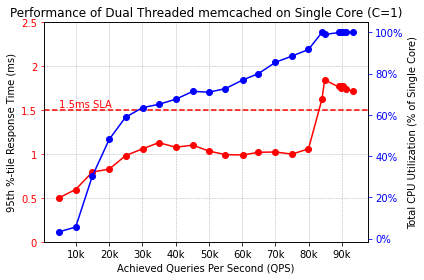

In [39]:
from matplotlib import pyplot as plt
from pylab import *
plt.figure(figsize=(10,5),dpi=100)

###########################################################
# Plot left axis

#plot(mcperf_c1['QPS'], mcperf_c1['Utilization'])mcperf_c1['Utilization']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.grid(linestyle='--', linewidth=0.5)
plt.axhline(y=1500, color='r', linestyle='--')
plt.text(5000, 1530, '1.5ms SLA', color='r')

plt.title('Performance of Dual Threaded memcached on Single Core (C=1)')

xlabs = ['0k', '10k', '20k','30k','40k','50k','60k', '70k','80k','90k','100k', '110k','120k']
plt.xticks(range(0, 120001, 10000), xlabs)
ax.tick_params(axis='y', colors='red')


# make a plot
pl1 = ax.plot(mcperf_c1['QPS'],  mcperf_c1['p95'], color="red", marker="o")
# set x-axis label

ylabs = ['0','0.5','1', '1.5', '2', '2.5']
plt.yticks(range(0,2501,500), ylabs)

ax.set_xlabel("Achieved Queries Per Second (QPS)",fontsize=10)
ax.set_ylabel('95th %-tile Response Time (ms)', fontsize=10)

ax2=ax.twinx()
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Total CPU Utilization (% of Single Core)', fontsize=10)

pl2 = ax2.plot(mcperf_c1['QPS'], mcperf_c1['Utilization'],color="blue",marker="o")

ylabs = ['0%','20%','40%', '60%','80%','100%']
plt.yticks(range(0,101,20), ylabs)

plt.tight_layout()
plt.savefig('PlotC1T2.pdf')
plt.show()

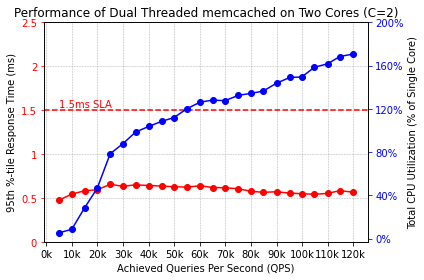

In [40]:
fig,ax = plt.subplots()
ax.grid(linestyle='--', linewidth=0.5)

plt.title('Performance of Dual Threaded memcached on Two Cores (C=2)')

xlabs = ['0k', '10k', '20k','30k','40k','50k','60k', '70k','80k','90k','100k', '110k','120k']
plt.xticks(range(0, 120001, 10000), xlabs)
ax.tick_params(axis='y', colors='red')
plt.axhline(y=1500, color='r', linestyle='--')
plt.text(5000, 1530, '1.5ms SLA', color='r')



# make a plot
pl1 = ax.plot(mcperf_c2['QPS'],  mcperf_c2['p95'], color="red", marker="o")
# set x-axis label

ylabs = ['0','0.5','1', '1.5', '2', '2.5']
plt.yticks(range(0,2501,500), ylabs)

ax.set_xlabel("Achieved Queries Per Second (QPS)",fontsize=10)
ax.set_ylabel('95th %-tile Response Time (ms)', fontsize=10)

ax2=ax.twinx()
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Total CPU Utilization (% of Single Core)', fontsize=10)

pl2 = ax2.plot(mcperf_c2['QPS'], mcperf_c2['Utilization'],color="blue",marker="o")

ylabs = ['0%','40%', '80%','120%', '160%','200%']
plt.yticks(range(0,201,40), ylabs)

plt.tight_layout()
plt.savefig('PlotC2T2.pdf')
plt.show()
